# Nearest Earth Objects

Notebook to derive tables and demonstrate figures on Nearest Earth Objects based on dataset from NASA.

Notebook Author: Soumyajit Kolay

In [1]:
# Setup Code
#(Prepare the environment by importing and initialize libraries)

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Completed!")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Setup Completed!


In [2]:
# Import the Datasets

# Path of the file to read
csv_filepath = "../input/nasa-nearest-earth-objects/neo_v2.csv"

# Read the file into a variable nasa_data
nasa_data = pd.read_csv(csv_filepath, index_col="id")
print("Import Successful!")

Import Successful!


In [3]:
# Print the first and last 5 rows of the dataset

nasa_data.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
id,,,,,,,,,
2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
# List all Objects and their Relative Velocities

nasa_data.loc[:, ['name', 'relative_velocity']]

,name,relative_velocity
id,,
2162635,162635 (2000 SS164),13569.249224
2277475,277475 (2005 WK4),73588.726663
2512244,512244 (2015 YE18),114258.692129
3596030,(2012 BV13),24764.303138
3667127,(2014 GE35),42737.733765
...,...,...
3763337,(2016 VX1),52078.886692
3837603,(2019 AD3),46114.605073
54017201,(2020 JP3),7566.807732


In [5]:
# List all Hazardous Objects

list_hazard = nasa_data.loc[nasa_data.hazardous == True]

list_hazard

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
id,,,,,,,,,
2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
54049873,(2020 OT6),0.252671,0.564989,58430.697200,3.833750e+07,Earth,False,20.11,True
2506491,506491 (2003 UW29),0.201630,0.450858,115899.180498,1.510102e+07,Earth,False,20.60,True
3781344,(2017 RV),0.110804,0.247765,48655.305132,3.279775e+07,Earth,False,21.90,True
...,...,...,...,...,...,...,...,...,...
3776295,(2017 NH),0.133216,0.297879,67595.756852,5.681059e+07,Earth,False,21.50,True
54235530,(2022 AY1),0.104847,0.234444,51149.696785,5.450002e+07,Earth,False,22.02,True
2138404,138404 (2000 HA24),0.356907,0.798068,33008.617883,7.189835e+07,Earth,False,19.36,True


In [6]:
# Stats on Relative Velocities of the objects

nasa_data.relative_velocity.describe()

count     90836.000000
mean      48066.918918
std       25293.296961
min         203.346433
25%       28619.020645
50%       44190.117890
75%       62923.604633
max      236990.128088
Name: relative_velocity, dtype: float64

In [7]:
# Stats on Relative Velocities of the Hazardous Objects

list_hazard.relative_velocity.describe()

count      8840.000000
mean      62794.337025
std       27175.110049
min        5908.291826
25%       43017.810183
50%       58658.010358
75%       78785.820511
max      193386.975218
Name: relative_velocity, dtype: float64

In [8]:
# Store Top 25 Fastest Hazardous Near-Earth Objects in a separate DataFrame
top_fastest_hazards = list_hazard.sort_values(by='relative_velocity', ascending=False).iloc[:25]

top_fastest_hazards

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
id,,,,,,,,,
3824084,(2018 JD2),0.441118,0.986370,193386.975218,7.466753e+07,Earth,False,18.90,True
3655362,(2013 YC),0.148100,0.331162,191176.458196,6.921508e+07,Earth,False,21.27,True
3670721,(2014 JO25),0.732074,1.636967,175424.757666,7.377460e+07,Earth,False,17.80,True
2374158,374158 (2004 UL),0.485909,1.086526,174875.355324,5.934208e+07,Earth,False,18.69,True
3724392,(2015 OC22),0.265800,0.594347,172227.337190,6.859516e+07,Earth,False,20.00,True
2425755,425755 (2011 CP4),0.152952,0.342011,170893.025786,7.391006e+07,Earth,False,21.20,True
3775155,(2017 KN34),0.303777,0.679266,167111.453695,6.472028e+07,Earth,False,19.71,True
3729835,(2015 TB145),0.260949,0.583499,167039.877907,5.945226e+07,Earth,False,20.04,True
2386454,386454 (2008 XM),0.265800,0.594347,166503.871663,5.413871e+07,Earth,False,20.00,True


In [9]:
top_fastest_hazards.iloc[0] # Display details about the fastest hazardous object

name                       (2018 JD2)
est_diameter_min             0.441118
est_diameter_max              0.98637
relative_velocity       193386.975218
miss_distance         74667534.229867
orbiting_body                   Earth
sentry_object                   False
absolute_magnitude               18.9
hazardous                        True
Name: 3824084, dtype: object

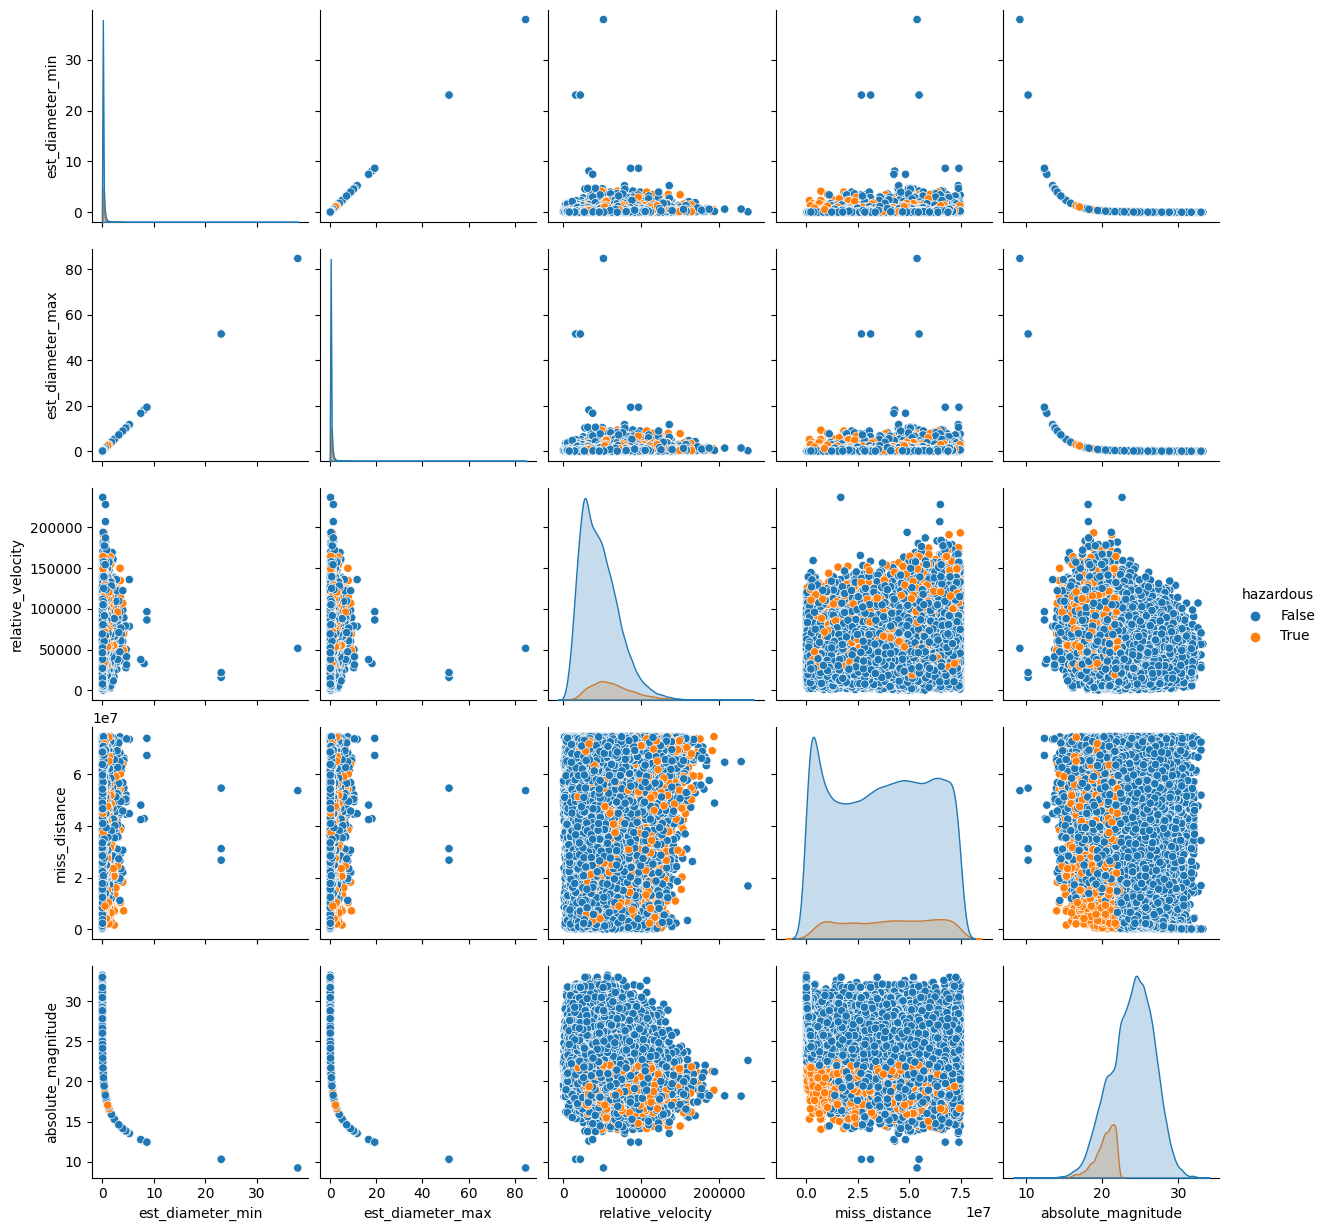

In [10]:
# demostrate all sorts of possible plots between all numeric values

sns.pairplot(
    data = nasa_data[['est_diameter_min','est_diameter_max','relative_velocity','miss_distance','absolute_magnitude','hazardous']],
    hue='hazardous'
)

Text(0.5, 0, 'Luminosity (Absolute Magnitude)')

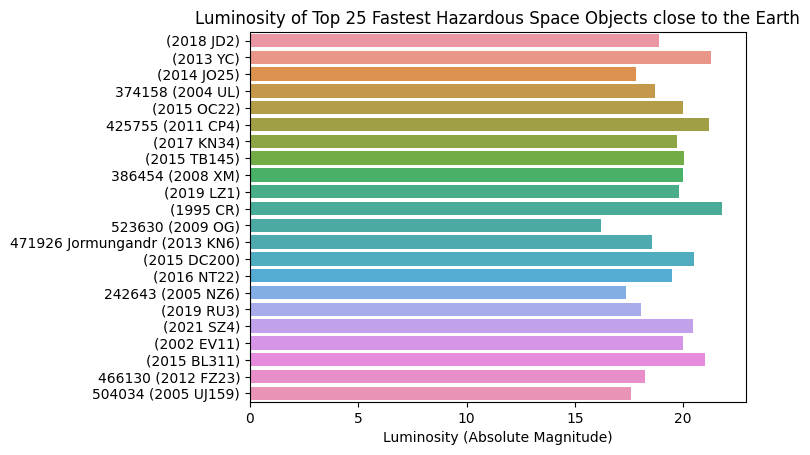

In [11]:
# Plot a bar graph to demonstrate Luminosity of Fastest Near-Earth Objects

plt.figure()
plt.title("Luminosity of Top 25 Fastest Hazardous Space Objects close to the Earth")
sns.barplot(x = top_fastest_hazards.absolute_magnitude, y = top_fastest_hazards.name)
plt.ylabel("")
plt.xlabel("Luminosity (Absolute Magnitude)")

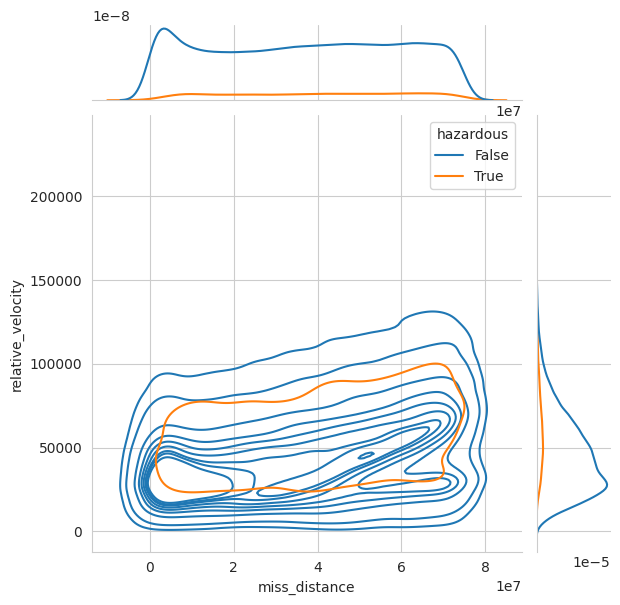

In [12]:
sns.set_style("whitegrid")
sns.jointplot(
    x=nasa_data['miss_distance'],
    y=nasa_data['relative_velocity'],
    data = nasa_data,
    hue = 'hazardous',
    kind="kde"
)

<AxesSubplot: xlabel='absolute_magnitude', ylabel='Count'>

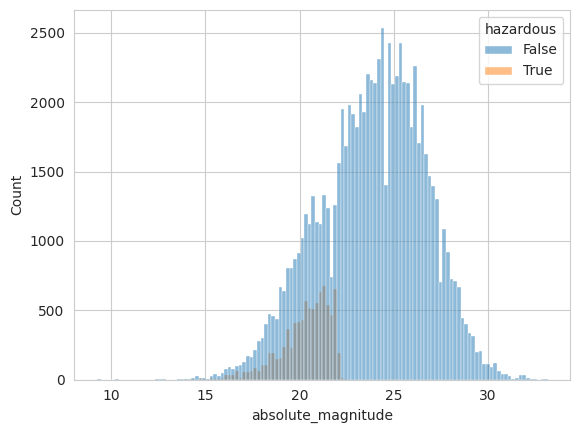

In [13]:
sns.histplot(data = nasa_data, x = 'absolute_magnitude', hue='hazardous')

/tmp/ipykernel_20/3411085382.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

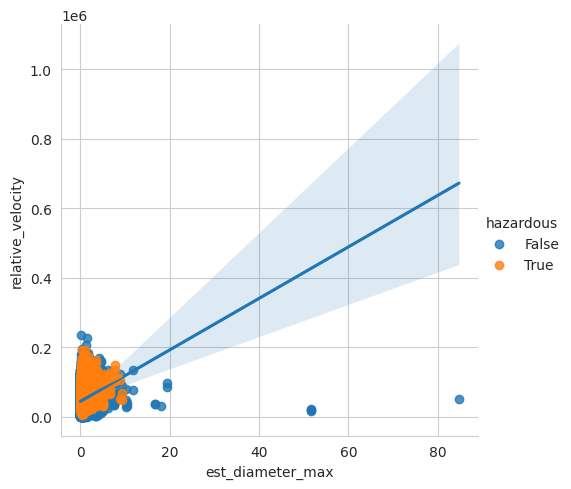

<Figure size 640x480 with 0 Axes>

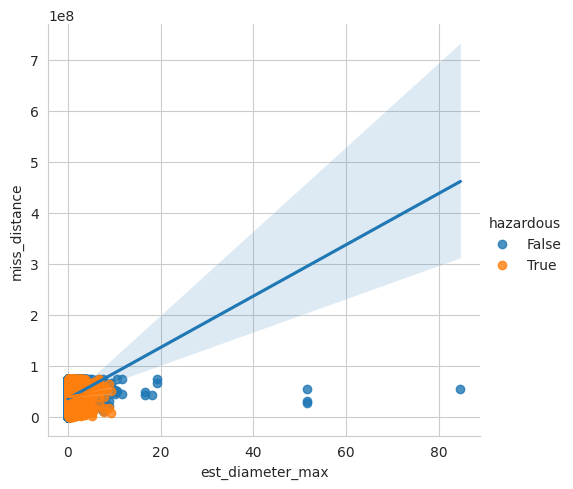

<Figure size 640x480 with 0 Axes>

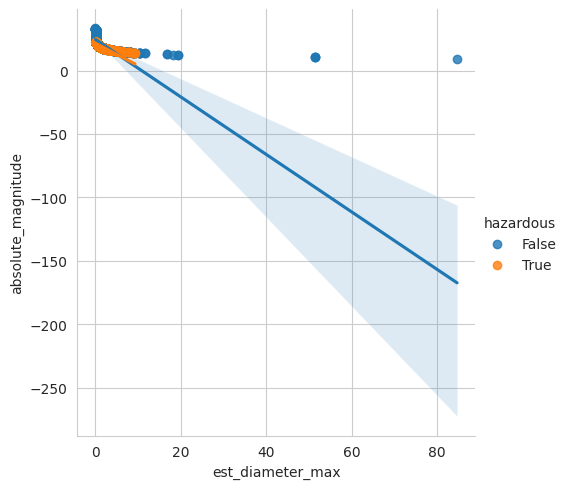

<Figure size 640x480 with 0 Axes>

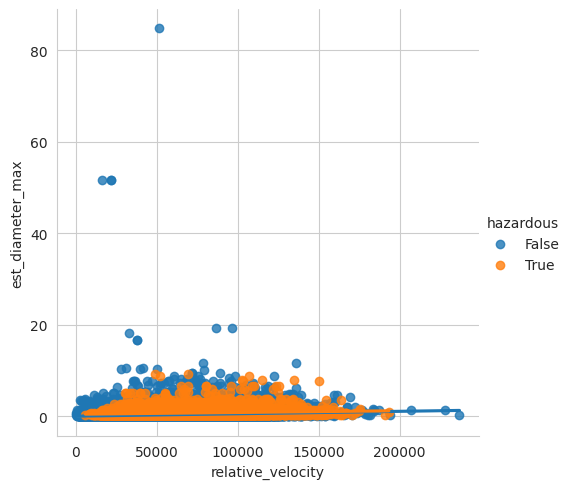

<Figure size 640x480 with 0 Axes>

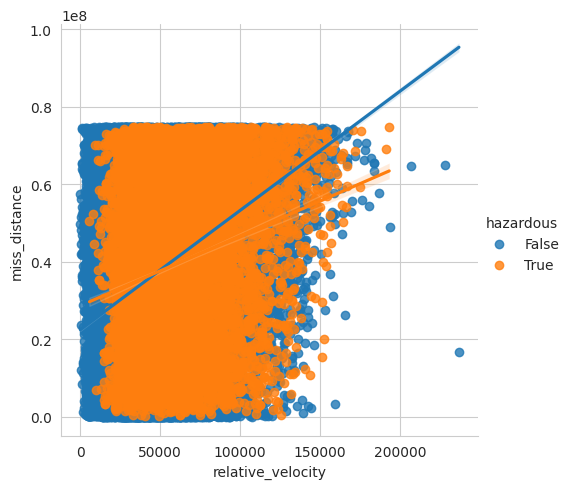

<Figure size 640x480 with 0 Axes>

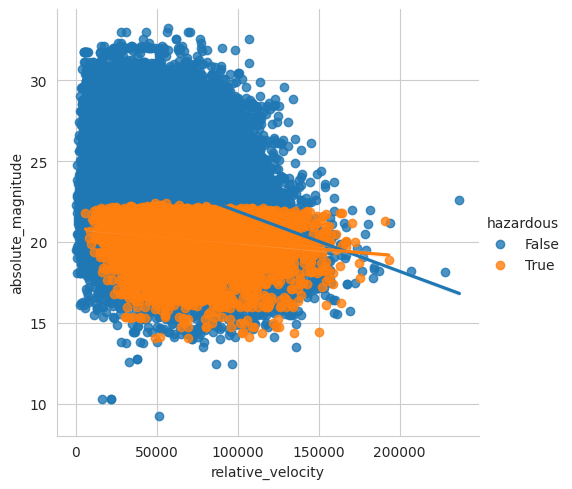

<Figure size 640x480 with 0 Axes>

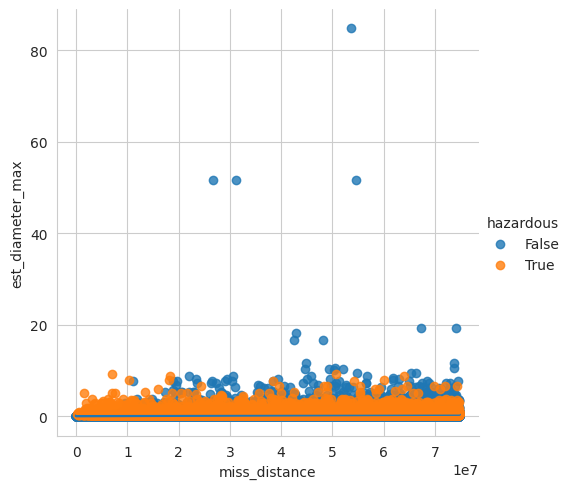

<Figure size 640x480 with 0 Axes>

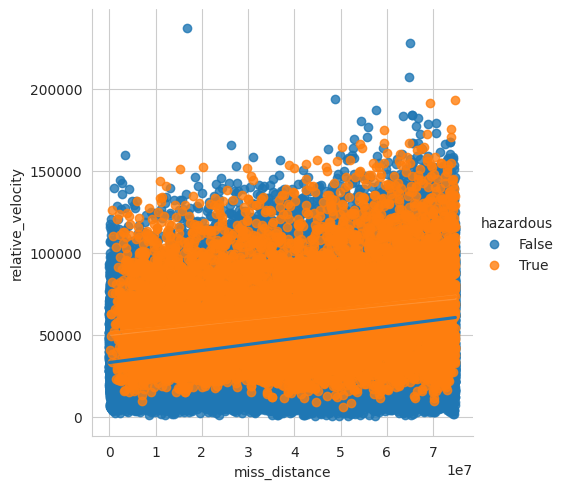

<Figure size 640x480 with 0 Axes>

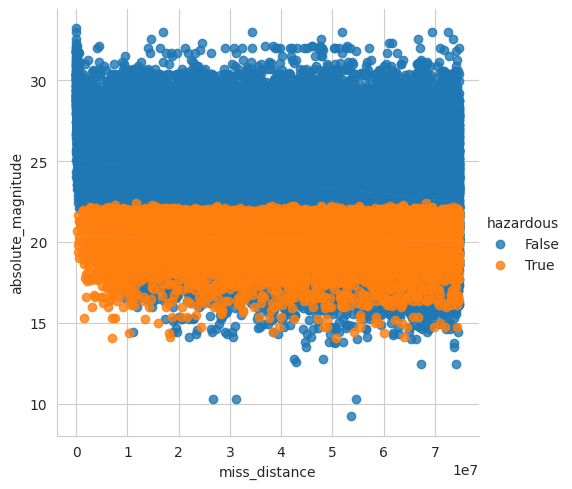

<Figure size 640x480 with 0 Axes>

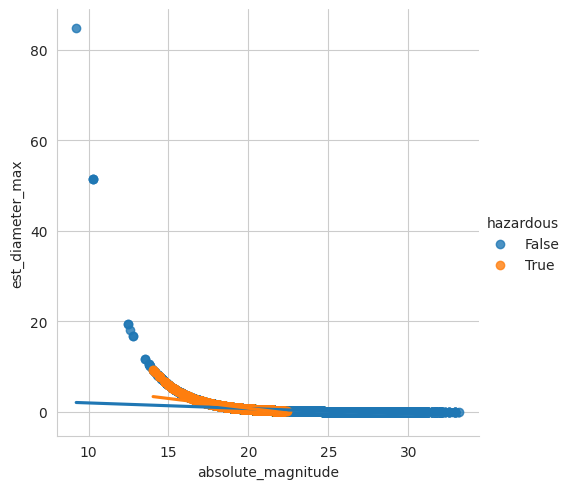

<Figure size 640x480 with 0 Axes>

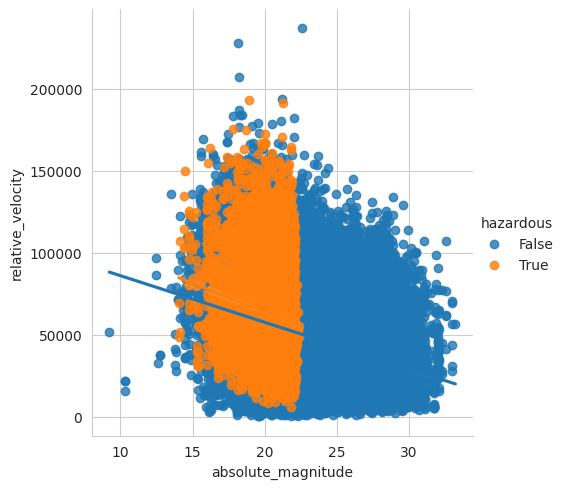

<Figure size 640x480 with 0 Axes>

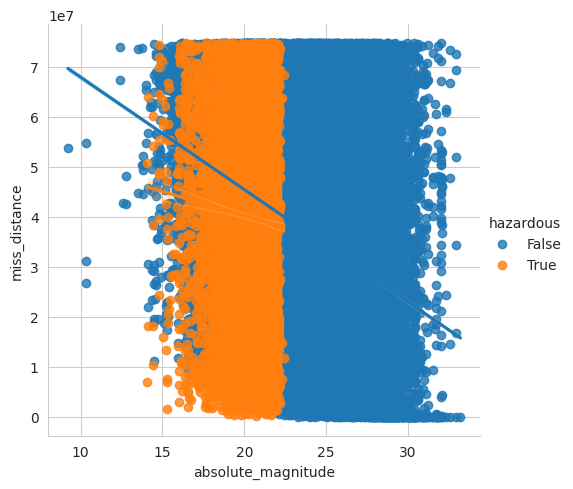

In [14]:
num_vals = ['est_diameter_max','relative_velocity','miss_distance','absolute_magnitude']

for p in num_vals:
    for q in num_vals:
        if p != q:
            plt.figure()
            sns.lmplot(
                x = p,
                y = q,
                hue = 'hazardous',
                data = nasa_data
            )